## Waste Management using CNN Model

In [66]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\vaish\appdata\local\programs\python\python312\lib\site-packages (4.11.0.86)




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import cv2
print(cv2.__version__)


4.11.0


In [72]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [73]:
train_path = "dataset/TRAIN"
train_path = "dataset/TEST"

In [74]:
import tensorflow as tf
print(tf.__version__)



2.18.0


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [76]:
# visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

  0%|          | 0/1401 [00:00<?, ?it/s]

100%|██████████| 1112/1112 [00:10<00:00, 108.69it/s]


In [77]:
data.shape

(2513, 2)

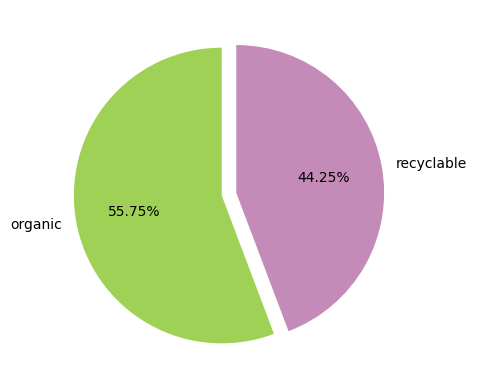

In [78]:
import matplotlib.pyplot as plt

colors = ['#a0d157', '#c48bb8']

# Use labels instead of label and convert label names to a list
plt.pie(data.label.value_counts(), labels=['organic', 'recyclable'], colors=colors, autopct='%0.2f%%',startangle=90, explode=(0.05,0.05))

plt.show()


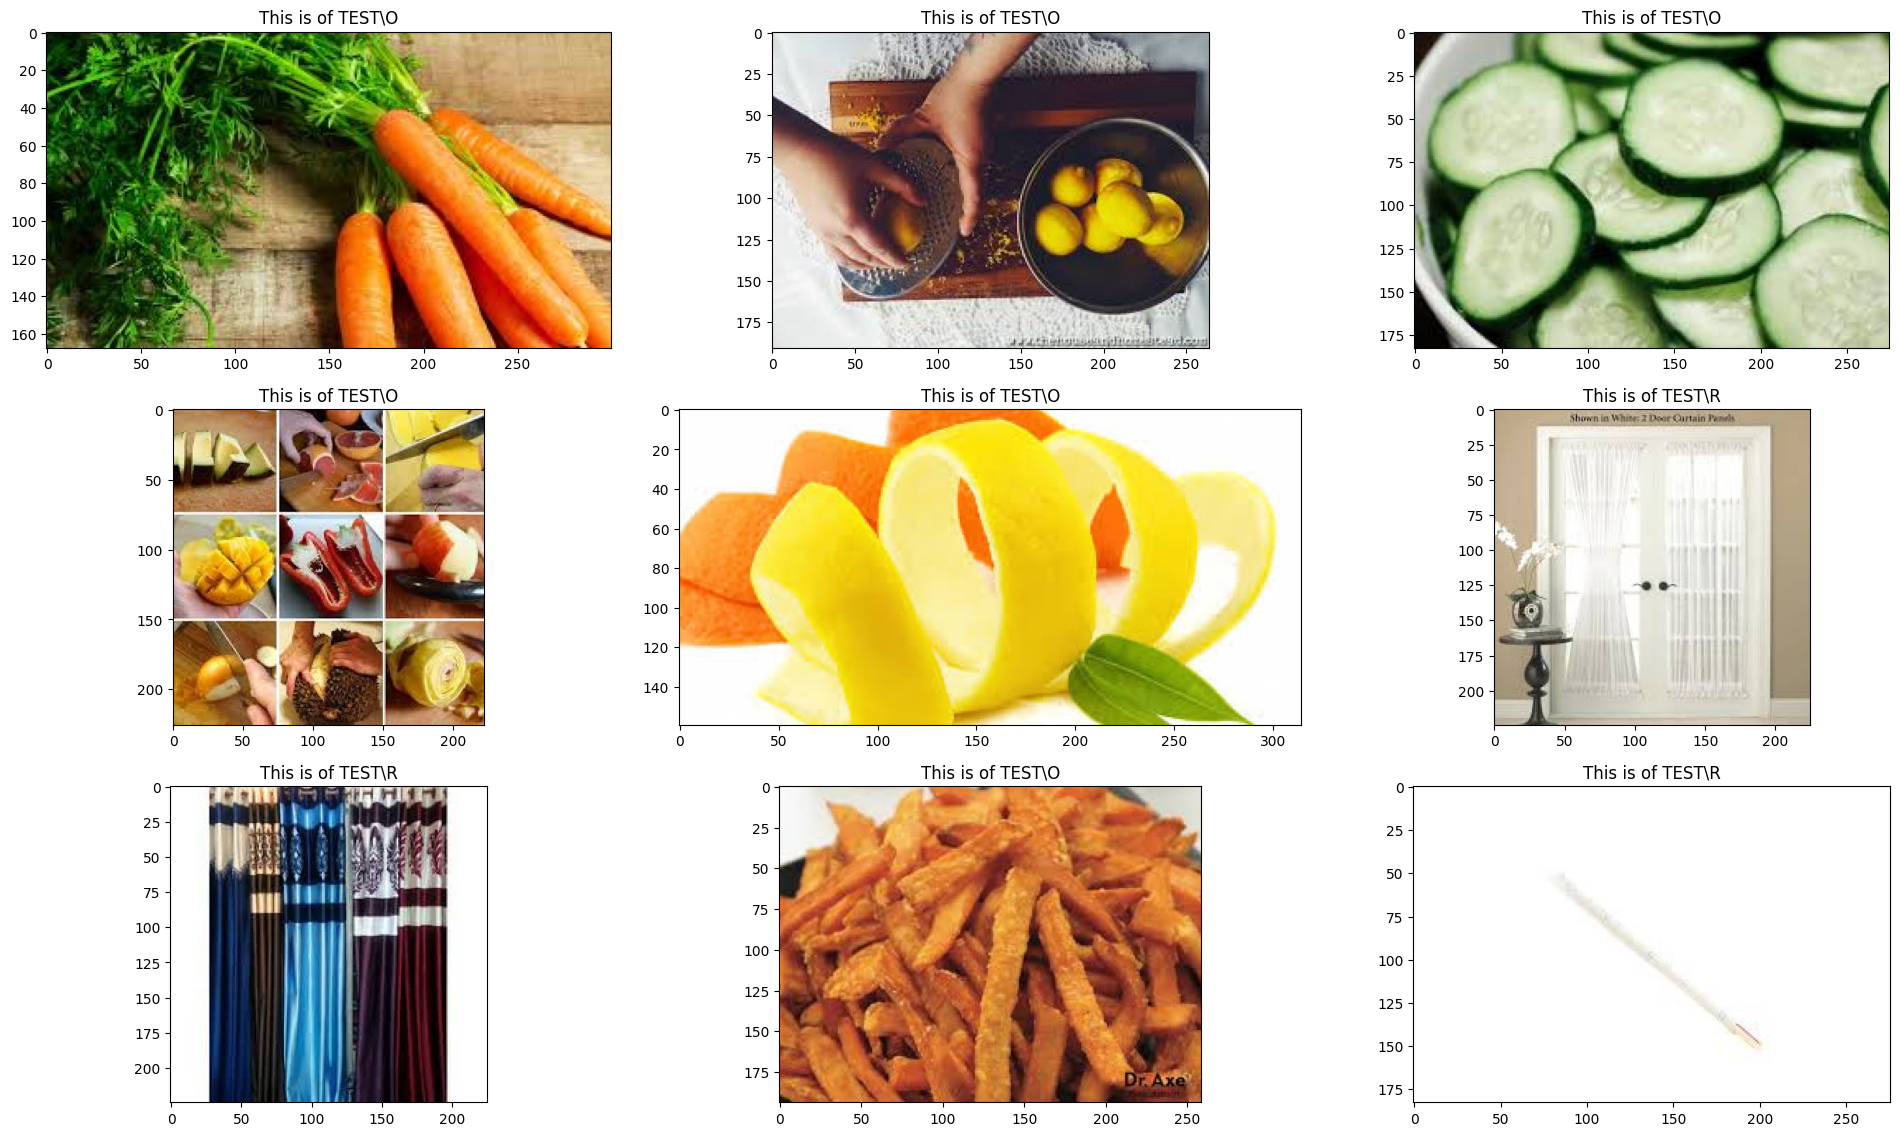

In [79]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(len(data.label))
    plt.title(f'This is of {data.label.iloc[index]}')
    plt.imshow(data.image.iloc[index])
    plt.tight_layout()
              

In [80]:
##CNN-Convolutional Neural Network

In [81]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256


In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
train_design = ImageDataGenerator(rescale = 1./255)

In [84]:
test_design = ImageDataGenerator(rescale=1./255)

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

test_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 2513 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [86]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 113s 11s/step - accuracy: 0.5422 - loss: 1.1629 - val_accuracy: 0.8297 - val_loss: 0.5513
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 91s 9s/step - accuracy: 0.7843 - loss: 0.5534 - val_accuracy: 0.8556 - val_loss: 0.3846
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 251s 27s/step - accuracy: 0.8488 - loss: 0.4073 - val_accuracy: 0.8798 - val_loss: 0.2929
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.8863 - loss: 0.3168 - val_accuracy: 0.8902 - val_loss: 0.2726
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 453s 50s/step - accuracy: 0.8896 - loss: 0.2977 - val_accuracy: 0.9136 - val_loss: 0.2139
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.9072 - loss: 0.2573 - val_accuracy: 0.9057 - val_loss: 0.2169
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 93s 10s/step - accuracy: 0.9090 - loss: 0.2550 - val_accuracy: 0.9184 - val_loss: 0.2061
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.9160 - loss: 0.2399 - val_accuracy: 0.9192 - v

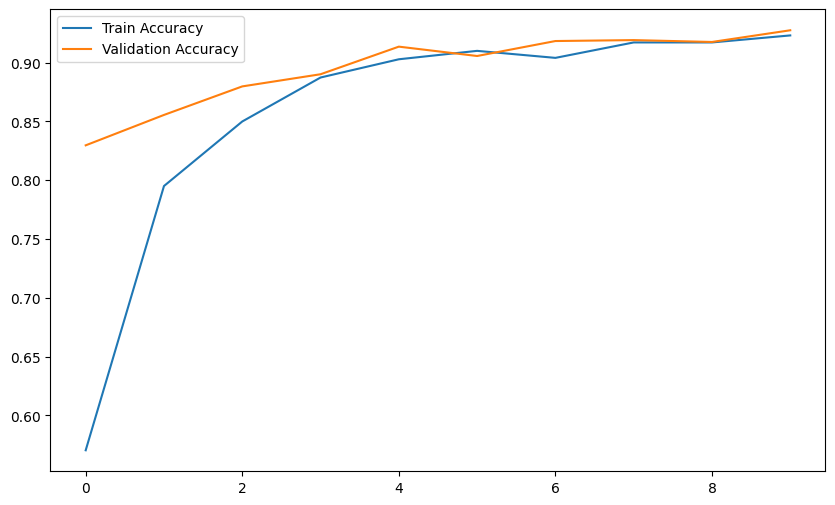

In [87]:
plt.figure(figsize = (10,6))
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()


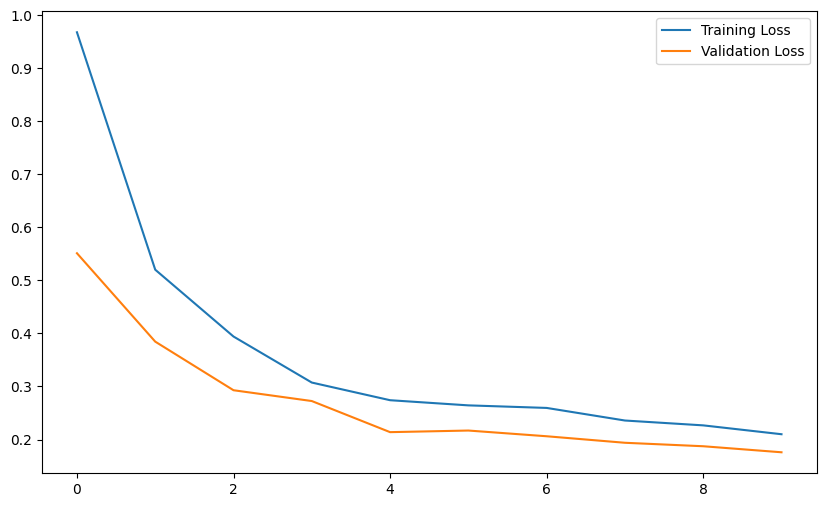

In [88]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [89]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img=cv2.resize(img, (224,224))
    img=np.reshape(img,[-1,224,224,3])
    result=np.argmax(model.predict(img))
    if result == 0:
        print('The image shown is Recyclable')
    elif result == 1: 
        print('The image shown is Organic Waste')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The image shown is Organic Waste


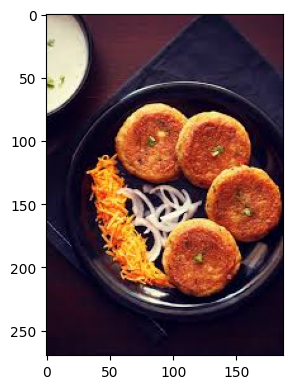

In [91]:
test_img = cv2.imread("C:/Users/vaish/OneDrive/Desktop/waste classification/dataset/TEST/O/O_13006.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
The image shown is Organic Waste


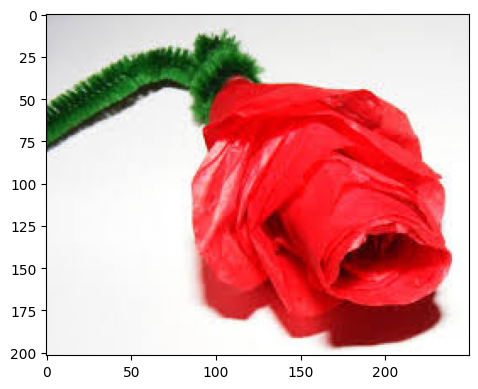

In [90]:
test_img = cv2.imread("C:/Users/vaish/OneDrive/Desktop/waste classification/dataset/TEST/R/R_11103.jpg")
predict_fun(test_img)